# Redes Complexas: uma introdução (parte 2)

In [2]:
# import da biblioteca networkx
import networkx as nx

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# import pandas
import pandas as pd

## Medidas de centralidade

As **métricas de centralidade** fazem parte de um grupo de métricas de redes chamadas métricas locais, que descrevem características individuais dos nós.

## Redes(grafos)

Considere um grafo $G =(V, E)$ onde $|V| = n$, $|E| = m$.

In [3]:
# grafo karate club
KCG = nx.karate_club_graph()

In [4]:
# imprime uma lista com os nós de g (karate club)
nodes_ = KCG.nodes()
print(f'nodes: {nodes_}')

# imprime uma lista com as arestas de g (karate club)
edges_ = KCG.edges()
print(f'arestas: {edges_}')

nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
arestas: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [5]:
n = nx.number_of_nodes(KCG) # número de nos
m = nx.number_of_edges(KCG) # número de arestas

print(f"numero de nos: {n}")
print(f"numero de arestas: {m}")

numero de nos: 34
numero de arestas: 78


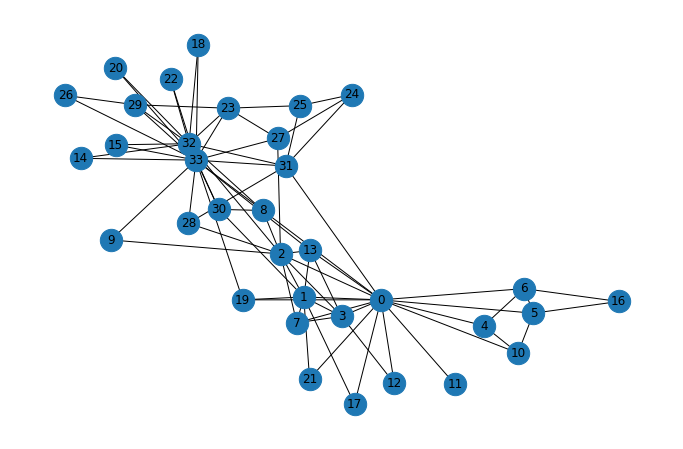

In [6]:
# grafico da grafo

fig, ax = plt.subplots(figsize=(12,8))

# imprime o grafo
nx.draw(KCG, node_size=500, with_labels = True)

plt.show()

In [7]:
# verifica se o grafo é conexo
print(nx.is_connected(KCG))

True


### Grau de centralidade

- A métrica de **grau** refere-se ao número de links de cada nó da rede. 

- **nx.degree()**: função do networkx que retorna o grau cada nó da rede.

- A métrica de **grau de centralidade** atribui uma pontuação(fração) de importância com base no número de links mantido por cada nó.

- A métrica **grau de centralidade** do nó $i$ é dado pela fórmula $\dfrac{grau(i)}{|V|}$ para cada $i \in V$.

- Essa métrica nos fala o quanto direto é a conexão de um nó com os outros nós da rede.

- **nx.degree_centrality()**: função do networkx que retorna o grau de centralidade de cada nó da rede.

In [8]:
# calcula o graus de cada no
dic_grau = dict(nx.degree(KCG))
val_grau = dic_grau.values()

In [9]:
set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

# imprime o grau dos nodes
#for key, value in dic_grau.items():
#    print(f"grau do no{key} : {value}")

Grau = {1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17}
1 : 11, 
2 : 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
3 : 4, 10, 19, 24, 25, 28, 
4 : 5, 6, 7, 27, 29, 30, 
5 : 8, 13, 23, 
6 : 3, 31, 
9 : 1, 
10 : 2, 
12 : 32, 
16 : 0, 
17 : 33, 


In [10]:
# rank em relacao ao grau

ranks = [(k, v) for k, v in sorted(dic_grau.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 17),
 (0, 16),
 (32, 12),
 (2, 10),
 (1, 9),
 (3, 6),
 (31, 6),
 (8, 5),
 (13, 5),
 (23, 5)]

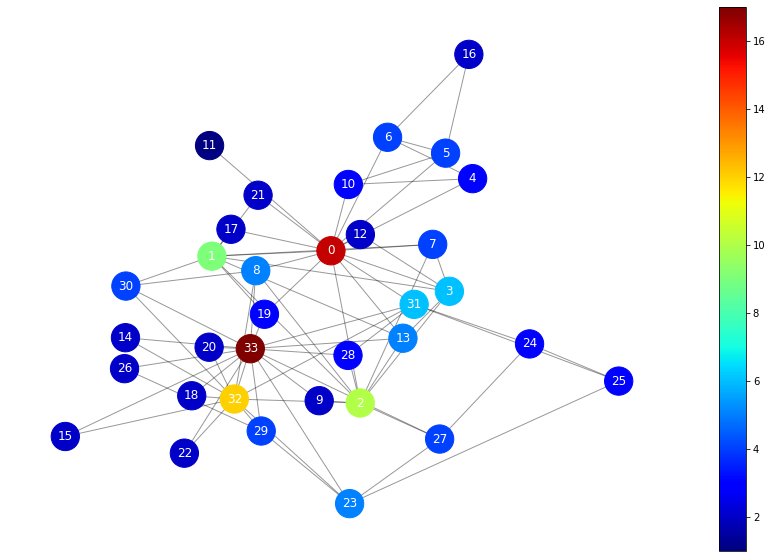

In [11]:
# grafico com graus

fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# define a cor do nos
color = list(dic_grau.values())

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [12]:
# grau de centralidade dos nodes da rede

dic_grau_center = nx.degree_centrality(KCG)
val_grau_center = dic_grau_center.values()

#set_grau_center = set(dic_grau_center.values())

#print(f"Grau_center: {set_grau_center}")

#for i in set_grau_center:
#    print(i, end= " : ")
#    for key, value in dic_grau_center.items():
#        if i == dic_grau_center[key]:
#            print(key, end=", ")
#    print()

In [13]:
# rank em relacao a centralidade de grau

ranks = [(k, v) for k, v in sorted(dic_grau_center.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152),
 (13, 0.15151515151515152),
 (23, 0.15151515151515152)]

In [14]:
# imprime grau de centralidade de cada node

#for key, value in grau_center.items():
#    print(f"grau de centralidade do no {key} : {value}")

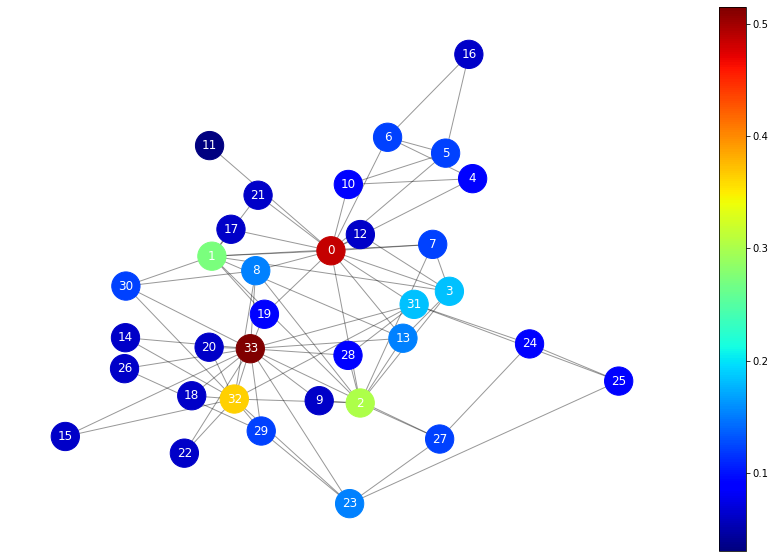

In [15]:
# grau de centralidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_grau_center)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=800,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

## Métricas geométricas

- Seja $G_i = (V_i,E_i)$ uma componente conexa de $G$ que contém o nó $i \in V$

- A **excentricidade** do nó $i \in G_i$ é a maior distância geodésica de um $i$ aos demais nós de $G_i$.
$$
ec(i) = \max_{j \in V_i} sp(i,j) \; \forall \; i \in V_i
$$
onde $sp(i,j)$ é o tamanho da distância geodésica do nó $i$ para o nó $j \in V_i$.

- A **centralidade de excentricidade** do nó $i$ é dado pela reciproca da sua excentricidade
$$
cec(i) = \frac{1}{ec(i)} \; \forall \; i \in V_i
$$



In [17]:
# calculo da excentricidade

dic_ec  = nx.eccentricity(KCG)
val_ec  = list(dic_ec.values())

set_ec = set(dic_ec.values())
print(f"EC = {set_ec}")

for i in set_ec:
    print(f"{i}", end= " : ")
    for key, value in dic_ec.items():
        if i == dic_ec[key]:
            print(f"{key}", end=", ")
    print()

EC = {3, 4, 5}
3 : 0, 1, 2, 3, 8, 13, 19, 31, 
4 : 4, 5, 6, 7, 9, 10, 11, 12, 17, 21, 24, 25, 27, 28, 30, 32, 33, 
5 : 14, 15, 16, 18, 20, 22, 23, 26, 29, 


In [167]:
#dic_cec = {}
#for key, value in dic_ec.items():
#    print(f"excentricidade do no {key} : {value}")

In [168]:
# rank em relacao a excentricidade

ranks = [(k, v) for k, v in sorted(dic_ec.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(14, 5),
 (15, 5),
 (16, 5),
 (18, 5),
 (20, 5),
 (22, 5),
 (23, 5),
 (26, 5),
 (29, 5),
 (4, 4)]

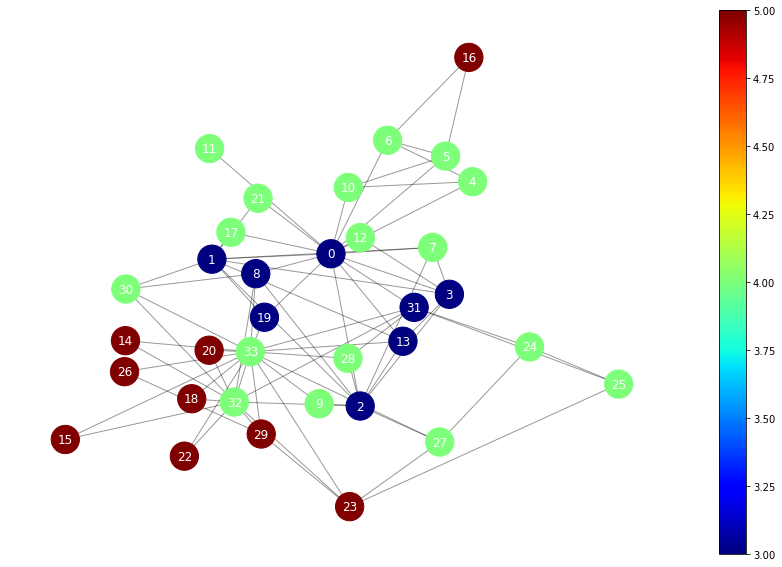

In [169]:
# grafico da excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_ec)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [170]:
# calculo da centralidade de excentricidade

dic_cec = {}
for key, value in dic_ec.items():
    dic_cec[key] = 1.0/value

val_cec = list(dic_cec.values())

In [171]:
set_cec = set(dic_cec.values())
print(f"CEC = {set_cec}")

for i in set_cec:
    print(i, end= " : ")
    for key, value in dic_cec.items():
        if i == dic_cec[key]:
            print(key, end=", ")
    print()

CEC = {0.3333333333333333, 0.25, 0.2}
0.3333333333333333 : 0, 1, 2, 3, 8, 13, 19, 31, 
0.25 : 4, 5, 6, 7, 9, 10, 11, 12, 17, 21, 24, 25, 27, 28, 30, 32, 33, 
0.2 : 14, 15, 16, 18, 20, 22, 23, 26, 29, 


In [172]:
# rank em relacao a centralidade de excentricidade

ranks = [(k, v) for k, v in sorted(dic_cec.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.3333333333333333),
 (1, 0.3333333333333333),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (8, 0.3333333333333333),
 (13, 0.3333333333333333),
 (19, 0.3333333333333333),
 (31, 0.3333333333333333),
 (4, 0.25),
 (5, 0.25)]

In [173]:
# imprime a centralidade de excentricidade

#for key, value in dic_cec.items():
#    print(f"centralidade de excentricidade do no {key} : {value}")

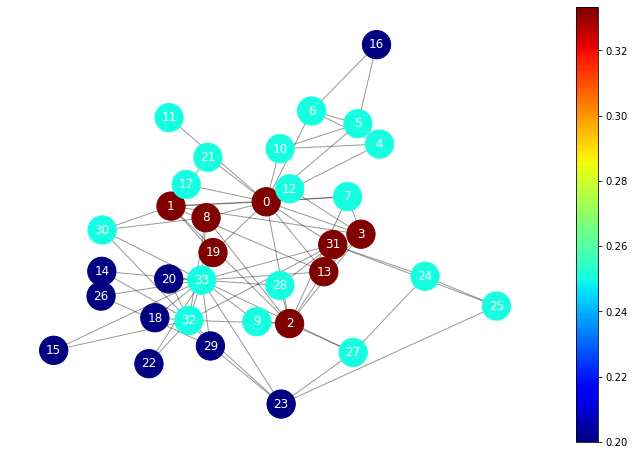

In [174]:
# grafico da centralidade de excentricidade

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cec)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

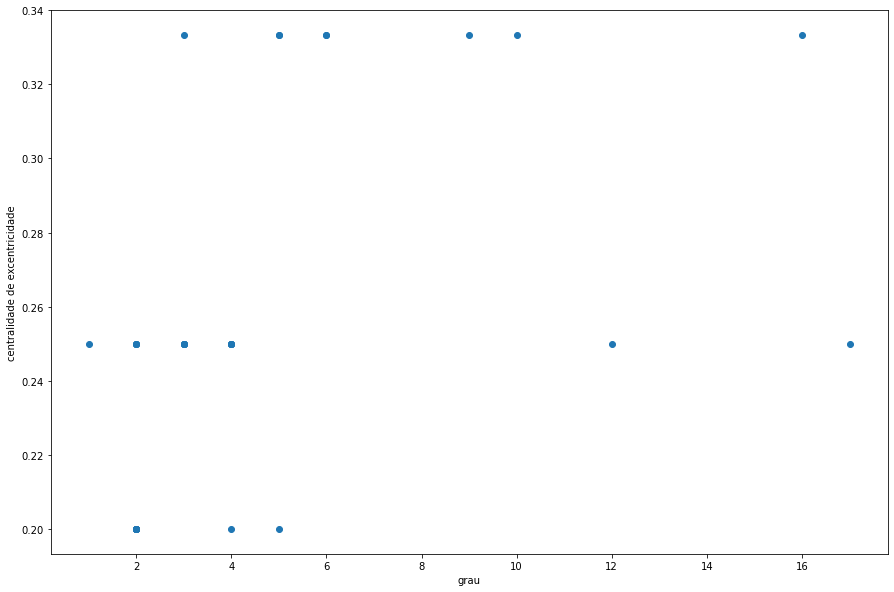

In [182]:
# grau x centralidade de excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))
plt.plot(val_grau, val_cec, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de excentricidade')
plt.show()

### Centralidade de proximidade

- A **centralidade de proximidade** pontua cada nó com base em sua **proximidade** com todos os outros nós da rede.

- Esta medida calcula os caminhos mais curtos entre todos os nós e, em seguida, atribui a cada nó uma pontuação com base na soma dos caminhos mais curtos.

- Podemos usar essa medida para encontrar os nós que estão em melhor posição para influenciar toda a rede mais rapidamente.

- A **centralidade de proximidade** do nó $i$ é igual ao reciproco da média aritmética das distâncias geodésicas do nó $i$ para os demais nós $j$ da mesma componente do nó $i$, ou seja
$$
C_{c}(i) = \dfrac{|V_i| - 1}{\sum_{j \in {V_i - \{i\}}} sp(i,j)} \; \forall \; i \in V_i
$$

- **nx.closeness_centrality()**: função do networkx que retorna a centralidade de proximidade de cada nó da rede.

In [176]:
# calculo da centralidade de proximidade

dic_cc  = nx.closeness_centrality(KCG)
val_cc  = list(dic_cc.values())

#set_cc = set(val_cc)
#print(f"CEC = {set_cc}")

#for i in set_cc:
#    print(i, end= " : ")
#    for key, value in dic_cc.items():
#        if i == dic_cc[key]:
#            print(key, end=", ")
#    print()

In [177]:
# rank em relacao a centralidade de proximidade

ranks = [(k, v) for k, v in sorted(dic_cc.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625),
 (13, 0.515625),
 (32, 0.515625),
 (19, 0.5),
 (1, 0.4852941176470588),
 (3, 0.4647887323943662)]

In [178]:
# imprime a centralidade de proximidade

#for key, value in dic_cc.items():
#    print(f"centralidade de proximidade do v{key} : {value}")

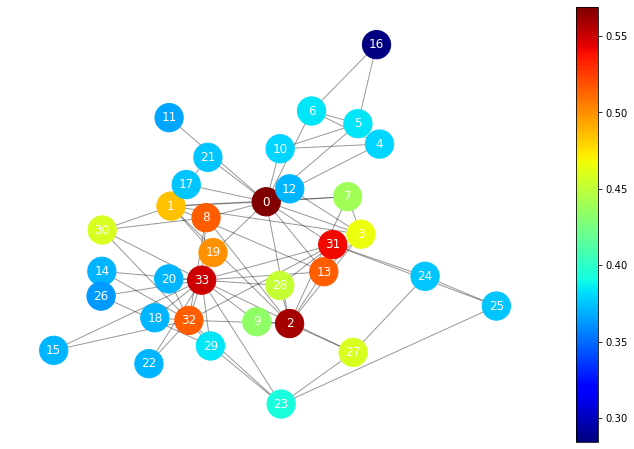

In [179]:
# grafico da centralidade de proximidade

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cc)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

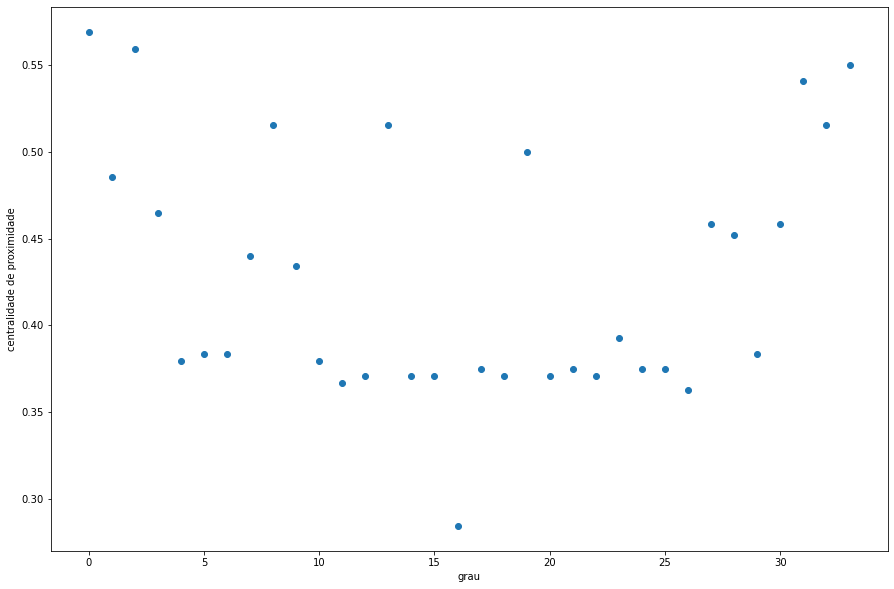

In [181]:
# grau x centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))
plt.plot(nodes_, val_cc, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de proximidade')
plt.show()

### Centralidade harmônica

- Na **centralidade harmônica** a média aritmética das distâncias presente na **centralidade de proximidade** é substituida pela **média harmônica** das mesmas em que nós pertencentes a componentes distintas possuem distâncias infinitas entre si, ou seja,
$$
C_h(i) = \dfrac{1}{n-1} \left[ \sum_{j\not=i} \dfrac{1}{sp(i,j)} \right] \; \forall \; i \in V
$$

- **nx.harmonic_centrality()**: função do networkx que retorna o centralidade harmônica de cada nó da rede, sem normalizar(sem dividor por $n-1$).

- A **centralidade harmônica** contorna o problema de redes com mais de uma componente conexas, onde temos distâncias geodésicas infinitas.

In [31]:
# calculo da centralidade harmonica

dic_chu = nx.harmonic_centrality(KCG)
val_chu = list(nx.harmonic_centrality(KCG).values())

set_chu = set(val_chu)
print(f"CHU = {len(set_chu)}")

for i in set_chu:
    print(i, end= " : ")
    for key, value in dic_chu.items():
        if i == dic_chu[key]:
            print(key, end=", ")
    print()


# imprime a centralidade harmonica
#for key, value in dic_chu.items():
#    print(f"centralidade harmonica do v{key} : {value}")

CHU = 26
11.099999999999996 : 16, 
13.916666666666666 : 24, 
13.916666666666664 : 25, 
13.950000000000001 : 26, 
14.200000000000003 : 14, 15, 18, 20, 22, 
14.16666666666667 : 17, 21, 
13.500000000000004 : 11, 
14.66666666666667 : 4, 10, 
15.16666666666667 : 5, 6, 
16.41666666666667 : 7, 
17.66666666666667 : 3, 
18.5 : 8, 13, 
19.16666666666667 : 1, 
21.0 : 2, 
23.16666666666666 : 0, 
19.333333333333336 : 31, 
20.916666666666668 : 32, 
23.25 : 33, 
14.000000000000004 : 12, 
15.583333333333334 : 9, 
15.366666666666669 : 29, 
16.033333333333335 : 23, 
16.916666666666664 : 27, 
16.416666666666664 : 28, 
16.916666666666668 : 30, 
17.5 : 19, 


In [32]:
# rank em relacao a centralidade harmonica

ranks = [(k, v) for k, v in sorted(dic_chu.items(), key=lambda item: -item[1])]

# os k melhores
k = 14
ranks[0:k]

[(33, 23.25),
 (0, 23.16666666666666),
 (2, 21.0),
 (32, 20.916666666666668),
 (31, 19.333333333333336),
 (1, 19.16666666666667),
 (8, 18.5),
 (13, 18.5),
 (3, 17.66666666666667),
 (19, 17.5),
 (30, 16.916666666666668),
 (27, 16.916666666666664),
 (7, 16.41666666666667),
 (28, 16.416666666666664)]

In [183]:
# centraliade harmonica normalizada

#chn = [x/(len(val_chu)-1) for x in val_chu]  # normalização

# normalizacao
dic_chn = {}
for key, value in dic_chu.items():
    dic_chn[key] = value/(n-1)
    #dic_chn[key] = chn[key]

val_chn = list(dic_chn.values())

#set_chn = set(val_chn)
#print(f"CHN = {len(set_chn)}")

#for i in set_chn:
#    print(i, end= " : ")
#    for key, value in dic_chn.items():
#        if i == dic_chn[key]:
#            print(key, end=", ")
#    print()

#for key, value in dic_chn.items():
#    print(f"centralidade harmonica normalizada do v{key} : {value}")

In [184]:
# rank em relacao a centralidade harmonica normalizada

ranks = [(k, v) for k, v in sorted(dic_chn.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.7045454545454546),
 (0, 0.7020202020202019),
 (2, 0.6363636363636364),
 (32, 0.6338383838383839),
 (31, 0.585858585858586),
 (1, 0.580808080808081),
 (8, 0.5606060606060606),
 (13, 0.5606060606060606),
 (3, 0.5353535353535355),
 (19, 0.5303030303030303)]

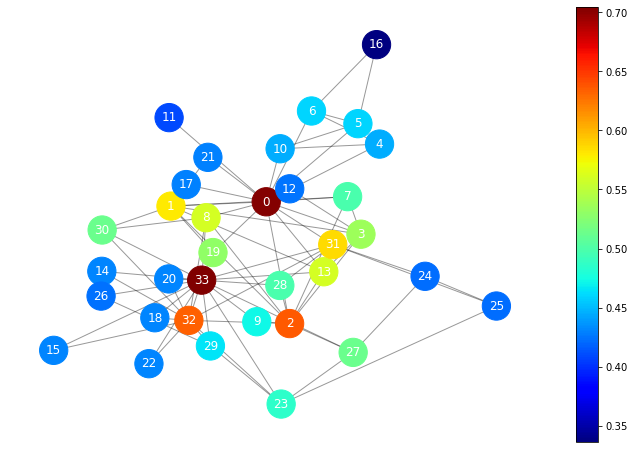

In [185]:
# gráfico da centralidade harmonica

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = val_chn

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

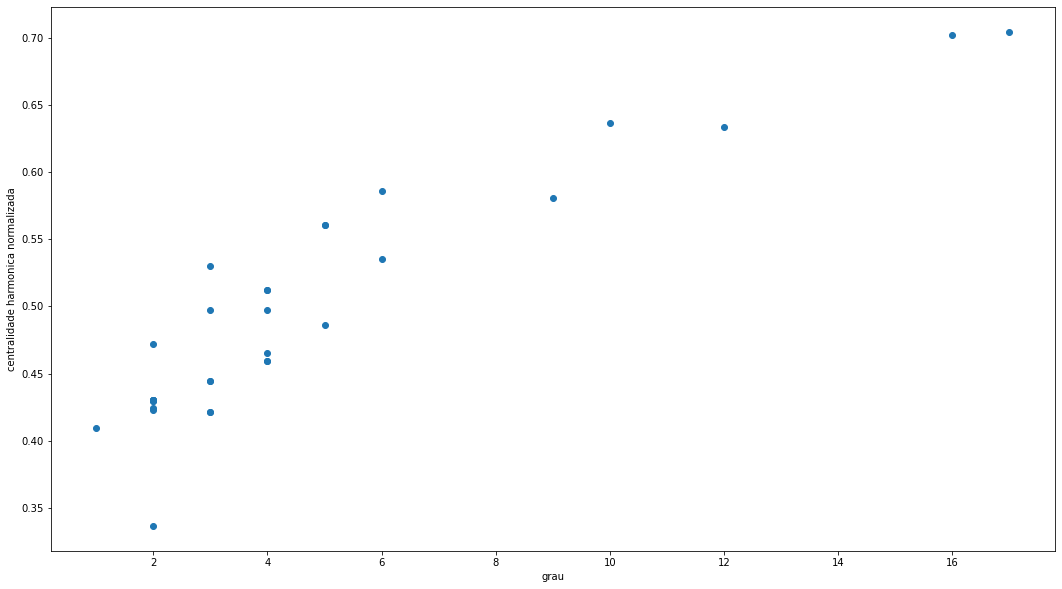

In [186]:
# grau x centralidade harmonica normalizada

fig, ax = plt.subplots(1,1,figsize=(18,10))
plt.plot(val_grau, val_chn , 'o')
plt.xlabel('grau')
plt.ylabel('centralidade harmonica normalizada')
plt.show()


### Centralidade de p-média

- A **centralidade de p-média** usa a noção de média generalizadas das distâncias.

- A **centralidade de p-média** generaliza as três médias anteriores: excentricidade, proximidade e harmônica.

- Fórmula da **centralidade de p-média**:

\begin{equation*}
C_{p}(i) = \left\{
\begin{matrix}
\left( \dfrac{\sum_{j \in  V_{i}-\{i\}} sp(i,j)^p}{n-1} \right)^{\dfrac{-1}{p}}, \; se \; p \not= 0 \\
\left( \prod_{j \in V_{i}-\{i\}} sp(i,j) \right)^{\dfrac{-1}{n-1}}, \; se \; p = 0 \\
\end{matrix}
\right.
\end{equation*}

In [190]:
# centralidade generalizada

n = KCG.number_of_nodes()

# valores de p
# linspace is an in-built function in Python's NumPy library. 
# It is used to create an evenly spaced sequence in a specified interval.
p = np.linspace(-1,1,n)

# comprimento dos caminhos mais curtos desde nó 1
sp = np.array(list(nx.shortest_path_length(KCG,1).values()))

# centralidade generalizada para o nó 1
cp = np.zeros(n)
for k in range(n):
    if p[k]:
        cp[k] = np.mean(sp[1:]** p[k])**(-1.0/p[k])
    else :
        cp[k] = np.prod(sp[1:])**(-1.0/(n - 1))

In [191]:
print(nx.shortest_path(KCG,1))

{1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 7: [1, 7], 13: [1, 13], 17: [1, 17], 19: [1, 19], 21: [1, 21], 30: [1, 30], 4: [1, 0, 4], 5: [1, 0, 5], 6: [1, 0, 6], 8: [1, 0, 8], 10: [1, 0, 10], 11: [1, 0, 11], 12: [1, 0, 12], 31: [1, 0, 31], 9: [1, 2, 9], 27: [1, 2, 27], 28: [1, 2, 28], 32: [1, 2, 32], 33: [1, 13, 33], 16: [1, 0, 5, 16], 24: [1, 0, 31, 24], 25: [1, 0, 31, 25], 23: [1, 2, 27, 23], 14: [1, 2, 32, 14], 15: [1, 2, 32, 15], 18: [1, 2, 32, 18], 20: [1, 2, 32, 20], 22: [1, 2, 32, 22], 29: [1, 2, 32, 29], 26: [1, 13, 33, 26]}


In [192]:
print(nx.shortest_path_length(KCG,1))

{1: 0, 0: 1, 2: 1, 3: 1, 7: 1, 13: 1, 17: 1, 19: 1, 21: 1, 30: 1, 4: 2, 5: 2, 6: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 27: 2, 28: 2, 31: 2, 32: 2, 33: 2, 14: 3, 15: 3, 16: 3, 18: 3, 20: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 3, 29: 3}


In [193]:
set_cp = set(cp)
#print("set_cp: ", set_cp)

for i in set_cp:
    print(i, end= " : ")
    for key in range(len(cp)):
        if i == cp[key]:
            print(key, end=", ")
    print()

#for i in range(len(cp)):
#    print(f"cp node {i} :  {cp[i]}")

0.5808080808080809 : 0, 
0.5773649074347137 : 1, 
0.5739428328326334 : 2, 
0.5705436669457304 : 3, 
0.5671691688048112 : 4, 
0.5638210410716109 : 5, 
0.5605009249290044 : 6, 
0.557210395355349 : 7, 
0.5539509568162438 : 8, 
0.5507240394018958 : 9, 
0.5475309954328849 : 10, 
0.5204996536712873 : 19, 
0.4993328699567602 : 27, 
0.48980118558245106 : 31, 
0.5262242941714637 : 17, 
0.5043613004318304 : 25, 
0.5069415512364585 : 24, 
0.5443730965514806 : 11, 
0.5381674032613998 : 13, 
0.4852941176470588 : 33, 
0.5412515313099311 : 12, 
0.5321154400196955 : 15, 
0.5095658040992932 : 23, 
0.4968845585438002 : 28, 
0.49447999254880154 : 29, 
0.4921189574284908 : 30, 
0.5018250846846161 : 26, 
0.5122339557484754 : 22, 
0.48752635995819854 : 32, 
0.51770117276051 : 20, 
0.5351217295535942 : 14, 
0.529149376756068 : 16, 
0.5149458295731395 : 21, 
0.5233408594881189 : 18, 


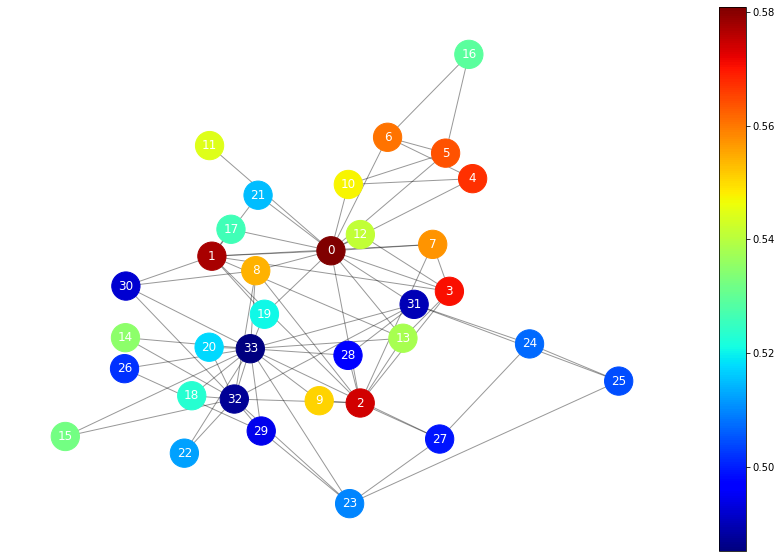

In [194]:
# centralidade generalizada

fig, ax = plt.subplots(1,1,figsize=(15,10))

# rede
G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = cp

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=800,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

### Centralidade de intermediação

- A **centralidade de intermediação** quantifica o quanto os vértices são capazes de atuar como intermediários entre outros dois vértices, podendo portanto controlar o fluxo de informação entre eles.

- $Q_{j,k}$: número de caminhos geodésicos iniciando no vértice $j$ e terminando no vértice $k$.

- $Q_{j,k}(i)$: número de caminhos geodésicos que iniciam em $j$, terminam em $k$ e passam pelo vértice $i$.

- $\dfrac{Q_{j,k}(i)}{Q_{j,k}}$: determina a importância do vértice $i$ para a conexão entre $j$ e $k$. Quanto maioro valor, maior é a importância do vértice $i$ para a conexão entre $j$ e $k$.

- Fórmula da centralidade por intermediação

$$
C_{b}(i) = \dfrac{1}{(n-1)(n-2)} \left[ \sum_{(j,k):j\not=k, i \not\in \{ j,k\}} \dfrac{Q_{j,k}(i)}{Q_{j,k}} \right] \; \forall \; i \in V
$$

- Função do networkx: **nx.betweenness_centrality()**

In [195]:
# calculo da centralidade de intermediação 

dic_cb = nx.betweenness_centrality(KCG, normalized=True)
val_cb = list(dic_cb.values())

#set_cb = set(dic_cb.values())
#print("set_cb: ", set_cb)

#for i in set_cb:
#    print(i, end= " : ")
#    for key, value in dic_cb.items():
#        if i == dic_cb[key]:
#            print(key, end=", ")
#    print()

#for key, value in dic_cb.items():
#    print(f"centralidade de intermediação do v{key} : {value}")

In [196]:
# rank em relacao a centralidade de autovetor

ranks = [(k, v) for k, v in sorted(dic_cb.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374)]

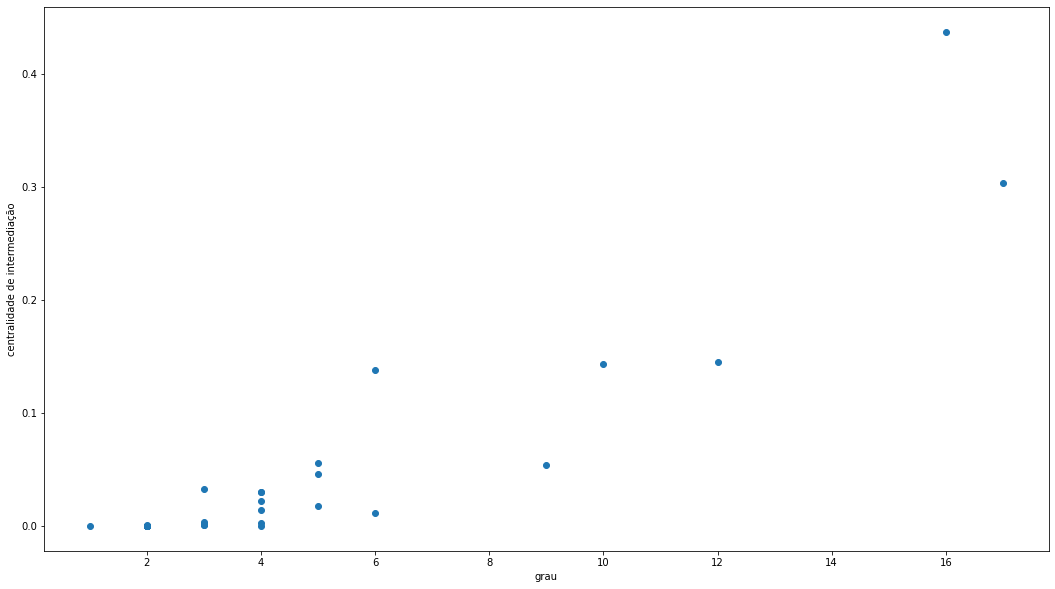

In [197]:
# grau x centralidade de intermediacao

fig, ax = plt.subplots(1,1,figsize=(18,10))
plt.plot(val_grau, val_cb, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de intermediação')
plt.show()

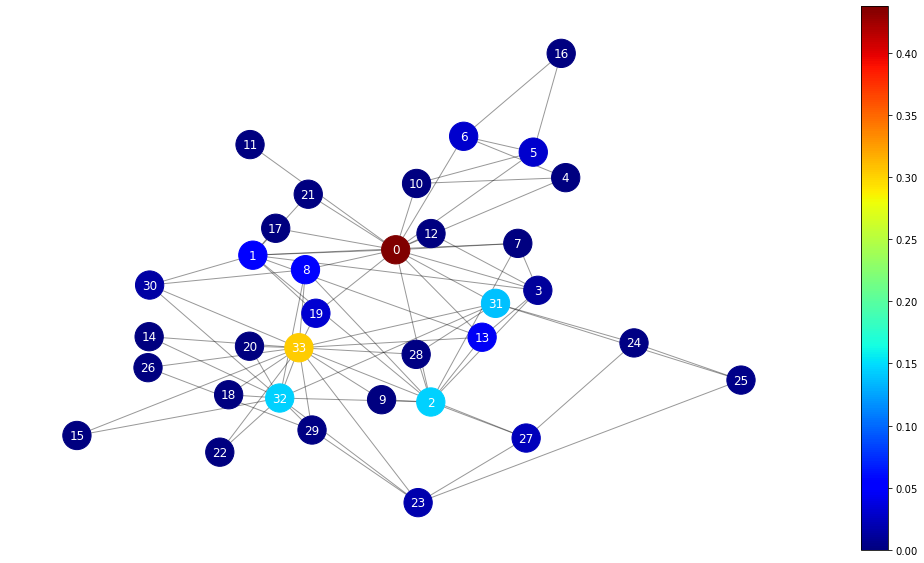

In [198]:
# gráfico da centralidade de intermediação 

G = KCG

fig, ax = plt.subplots(1,1,figsize=(18,10))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cb)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

### Centralidade de Autovetor

- A centralidade de autovetor é uma medida que leva em conta não somente a quantidade de vizinhos que um vértice possui, mas também a importância destes vizinhos.

- Seja $C_{eg}^{0} = ( C_{eg}^{0}(1), C_{eg}^{0}(2), \ldots, C_{eg}^{0}(n) )$ um vetor não negativo com valor inicial associado a importância de cada nó na rede.

- Podemos atualizar a importância do nó $i$ da rede, somando a importância dos seus vizinhos, ou seja,
$
C_{eg}^{1} (i) = \sum_{j=1}^{n} A(i,j) C_{eg}^{0}(j).
$

- Temos que $C_{eg}^{1} = A C_{eg}^{0}$, e repetindo $x$ vezes temos $C_{eg}^{x} = A^{x} C_{eg}^{0}$.

- Considere $C_{eq}^{0} = \sum_{i=1}^{n} b_i v_i$, onde $v_i$ é o autovetor $i$ da matriz $A$. Temos
\begin{align*}
C_{eg}^{x} & = A^{x} \sum_{i} b_{i} v_{i} \\
& = \sum_{i} b_i A^{x} v_i \\
& = \sum_{i} b_i (\lambda_i)^{x} v_{i} \\
& = (\lambda_{1})^{x} \sum_{i} b_i \left( \dfrac{\lambda_{i}}{\lambda_{1}} \right)^{x} v_{i}
\end{align*}
onde $\lambda_1 = \max_{i} { |\lambda_{i}|}$ 

- A centralidade de autovetor pode ser definida como um vetor que satisfaz $AC_{eg} = \lambda_{1} C_{eg}$.

- Temos que $C_{eg}(i) = \dfrac{1}{\lambda_{1}} \sum_{j=1}^{n} A(i,j) C_{eg} (j)$ para cada nó $i$ da rede.

- **nx.eigenvector_centrality_numpy()**: função do **networkx** que retorna a centralidade de autovetor dos nós de uma rede.


In [199]:
# calculo da centralidade de autovetor

dic_cev = nx.eigenvector_centrality_numpy(KCG)
val_cev = list(dic_cev.values())

#set_cev = set(dic_cev.values())
#print("set_cev: ", set_cev)

#for i in set_cev:
#    tmp = []
#    for key, value in dic_cev.items():
#        if i == dic_cev[key]:
#            tmp.append(key)
#    print(i, "=", set(tmp))

In [200]:
# imprime centralidade de autovetor

#for k, val in dic_cev.items():
#    print(f"centralidade do autovetor do v{k}: {val}")

In [201]:
# rank em relacao a centralidade de autovetor

ranks = [(k, v) for k, v in sorted(dic_cev.items(), key=lambda item: -item[1])]

# os k melhores
k = 14
ranks[0:k]

[(33, 0.37336347029148403),
 (0, 0.3554914445245658),
 (2, 0.31719250448643116),
 (32, 0.3086442197910479),
 (1, 0.265959919552491),
 (8, 0.22740390712540023),
 (13, 0.22647272014248082),
 (3, 0.2111797203778897),
 (31, 0.19103384140654397),
 (30, 0.174758302314353),
 (7, 0.1709597480447958),
 (23, 0.1501185718611534),
 (19, 0.14791251029338748),
 (29, 0.1349608192623283)]

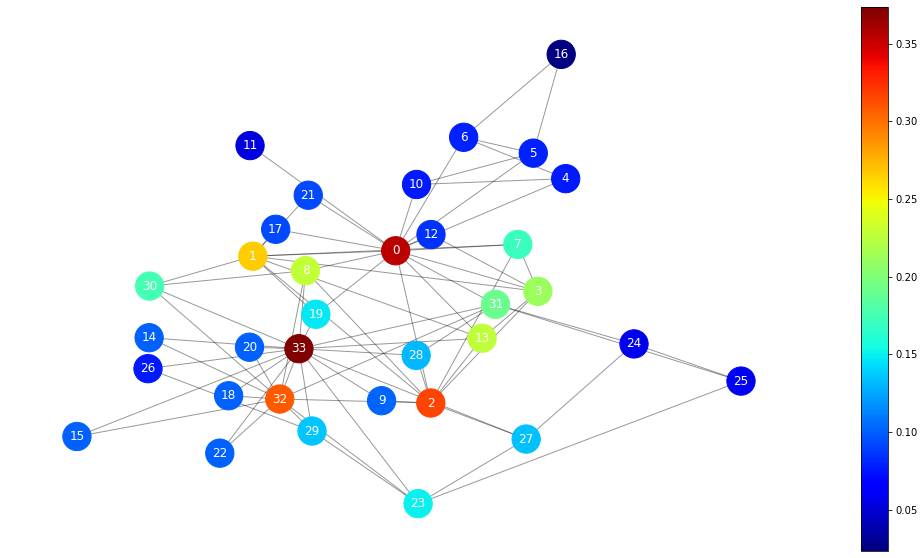

In [202]:
# gráfico da centralidade de autovetor

G = KCG

fig, ax = plt.subplots(1,1,figsize=(18,10))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cev)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

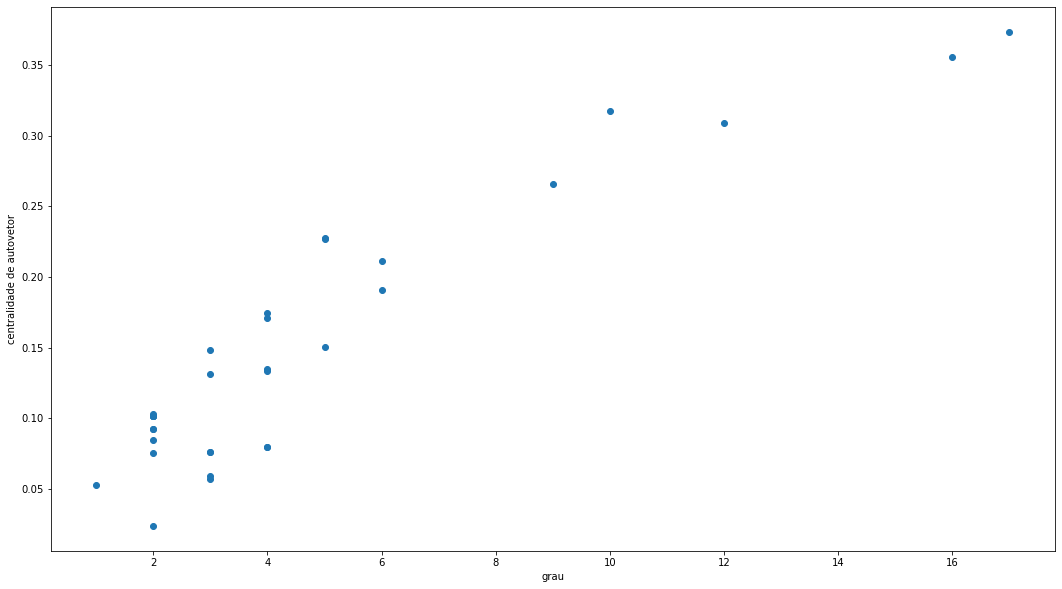

In [203]:
# graus x centralidade de autovetor

fig, ax = plt.subplots(1,1,figsize=(18,10))
plt.plot(val_grau, val_cev, 'o')
#plt.plot(nodes_, val_cev, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de autovetor')
plt.show()

### Centralidade de Katz

- Na **centralidade de Katz** é adicionado um valor de centralidade para todos os nós da rede, usando a fórmula

$$
C_K(i)=\alpha\sum_{j\ne i} A(i,j)C_K(j) +\beta,
$$
onde $\alpha$ e $\beta$ são constantes positivas. 

- $\beta$ é o valor de centralidade que os nós de grau nulo possuem e $\alpha< 1/\lambda_1$ em que $\lambda_1$ é o maior autovalor de $A$. 

e
$$
C_K=\beta(I-\alpha A)^{-1}\overline{1}
$$

- **nx.katz_centrality_numpy()**: função do **networkx** que retorna a **centralidade de Katz** dos nós de uma rede.

In [204]:
# calculo da centralidade de Katz

G = KCG

dic_ck1 = nx.katz_centrality_numpy(G, alpha=0.08, beta=1)
dic_ck2 = nx.katz_centrality_numpy(G, alpha=0.05, beta=1)
dic_ck3 = nx.katz_centrality_numpy(G, alpha=0.01, beta=1)

val_ck1 = list(dic_ck1.values())
val_ck2 = list(dic_ck2.values())
val_ck3 = list(dic_ck3.values())

/home/jossian/.local/lib/python3.10/site-packages/networkx/algorithms/centrality/katz.py:325: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=nodelist, weight=weight).todense().T


In [205]:
#for k, val in dic_ck1.items():
#    print(f"centralidade de katz do no {k} : {val}")

In [206]:
# rank em relacao a centralidade de katz

ranks = [(k, v) for k, v in sorted(dic_ck1.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.30725493408091975),
 (0, 0.299002768062596),
 (32, 0.2578375240193988),
 (2, 0.2461035525543904),
 (1, 0.223619059446814),
 (8, 0.19165011255401793),
 (31, 0.19093594930107322),
 (13, 0.19066378095241493),
 (3, 0.18972556090877546),
 (23, 0.1701630608845245)]

In [207]:
# rank em relacao a centralidade de katz

ranks = [(k, v) for k, v in sorted(dic_ck2.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.26396018442161423),
 (0, 0.25808052841715257),
 (32, 0.22880512506761874),
 (2, 0.21770268016629069),
 (1, 0.20548908441800137),
 (31, 0.18435733882503616),
 (3, 0.18278661148873868),
 (8, 0.18086231829776936),
 (13, 0.18043628836332615),
 (23, 0.17257850397310553)]

In [208]:
# rank em relacao a centralidade de katz

ranks = [(k, v) for k, v in sorted(dic_ck3.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.1921946512991548),
 (0, 0.19061873772703286),
 (32, 0.1839413957936422),
 (2, 0.18075364968051674),
 (1, 0.17888064190438605),
 (31, 0.17398840210974173),
 (3, 0.1738664527735831),
 (8, 0.17244595187692124),
 (13, 0.17242860793565898),
 (23, 0.1721191019258633)]

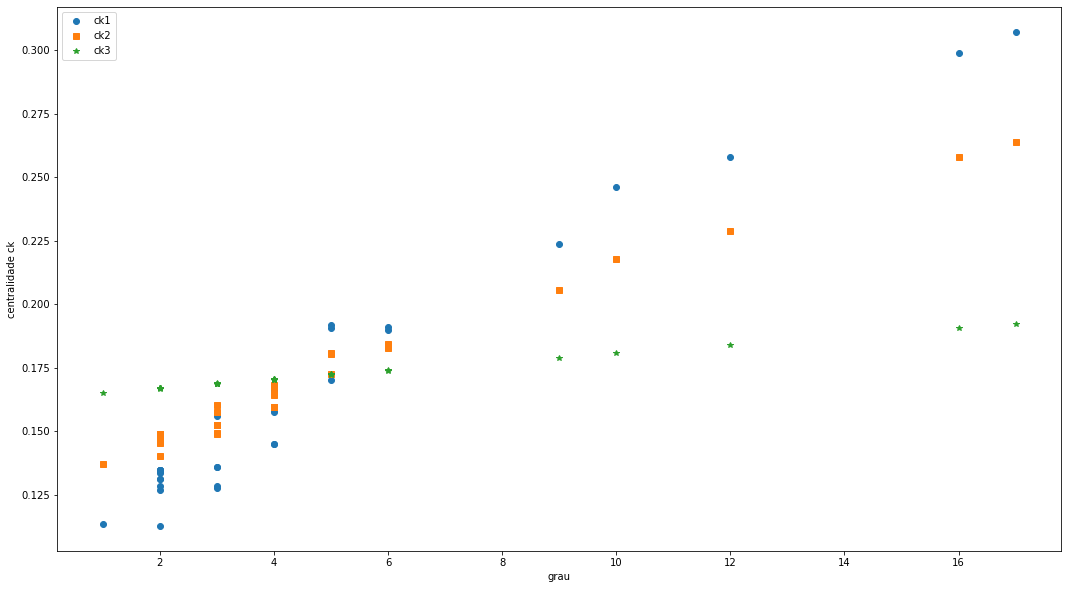

In [209]:
# grau x centralidade ck

fig = plt.subplots(1,1,figsize=(18,10))

plt.plot(val_grau, val_ck1, 'o', label = 'ck1')
plt.plot(val_grau, val_ck2, 's', label = 'ck2')
plt.plot(val_grau, val_ck3, '*', label = 'ck3')
plt.legend()

plt.xlabel('grau')
plt.ylabel('centralidade ck')

plt.show()

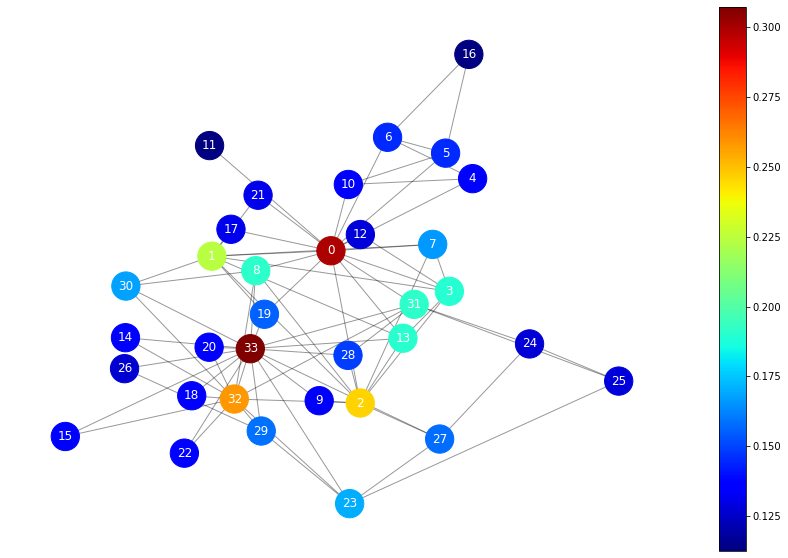

In [210]:
# centralidade de katz do BTG

G = KCG

# katz
ck = val_ck1

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = ck

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=800,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

### PageRank

- O **pagerank** assume que a importância de um nó é dividida igualmente entre os seus vizinhos e tem a fórmula
$$
C_{PR}(i)=(1-\alpha)+\alpha\sum_{j\ne i}\frac{A(j,i)C_{PR}(j)}{d^{out}(j)},
$$
em que $\alpha\in (0,1)$. 

- O valor $\alpha$ pode ser pensado como a probabilidade de um usuário continuar navegando entre páginas através dos links. 

- Para um vértice $j$ com $d^{out}(j) = 0$, como $j$ não contribui para a importância de nenhum outro nó, adota-se a convenção de que $d^{out}(j) = 1$ na fórmula acima.

- Em termos matriciais, temos:
$$
C_{PR}^T=(1-\alpha)\overline{1}^T+\alpha C_{PR}^T DA ,
$$
onde $D$ é uma matriz diagonal tal que $D(i,i)=\min(\frac{1}{d^{out}(i)},1)$. 

- Portanto,
$$
C_{PR}^T=(1-\alpha)\overline{1}^T(I-\alpha DA)^{-1}.
$$

- No **networkx**, os valores dos **pagerank** são normalizados para que a soma deles dê igual a 1.

In [211]:
# calculo da centralidade de PageRank variando valor de \alpha

G = KCG

dic_cpr1 = nx.pagerank(G, alpha=0.85)
dic_cpr2 = nx.pagerank(G, alpha=0.65)
dic_cpr3 = nx.pagerank(G, alpha=0.25)

val_cpr1 = nx.pagerank(G, alpha=0.85).values()
val_cpr2 = nx.pagerank(G, alpha=0.65).values()
val_cpr3 = nx.pagerank(G, alpha=0.25).values()

In [212]:
# os valores dos **pagerank** são normalizados para que a soma deles dê igual a 1

print(f"soma pageranks = {np.sum(list(val_cpr3))}")

soma pageranks = 1.0


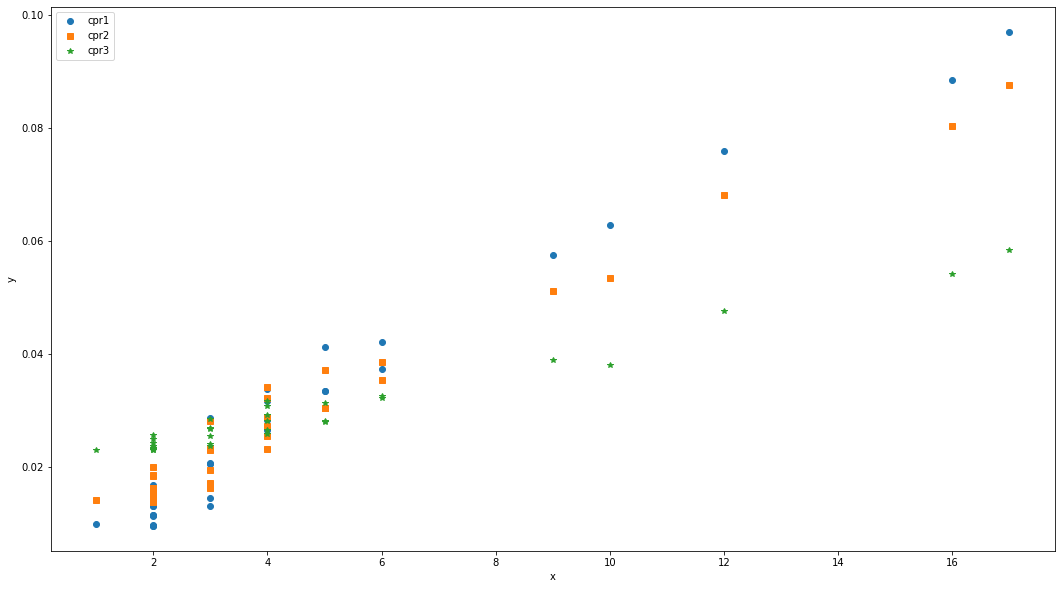

In [213]:
fig = plt.subplots(1,1,figsize=(18,10))

plt.plot(val_grau, val_cpr1, 'o', label = 'cpr1')
plt.plot(val_grau, val_cpr2, 's', label = 'cpr2')
plt.plot(val_grau, val_cpr3, '*', label = 'cpr3')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Coeficiente de agrupamento local

- Permite avaliar o quanto os nós são capazes de proporcionar interação entre os seus vizinhos. 

- O coeficiente de agrupamento local de um nó $i$ é dado por:

$$
cl(i)=\frac{\sum\limits_{(j,k):j\ne i,k\ne i,k\ne j}A(i,j)A(i,k)A(j,k)}{\sum\limits_{(j,k):j\ne i,k\ne i,k\ne j}A(i,j)A(i,k)}.
$$

- Vértices que possuem grau 0 ou 1 possuem coeficiente de agrupamento local nulo. 

- Pode-se definir o coeficiente de agrupamento local médio:

$$
\overline{cl}(G)=\frac{1}{n}\sum\limits_{i=1}^ncl(i).
$$

- **nx.clustering()**: função do **networkx** que retorna o coeficiente de agrupamento local.

- **nx.average_clustering()**: função do **networkx** que retorna o coeficiente de agrupamento médio.

- **nx.transitivity()**: função do **networkx** que retorna o coeficiente de agrupamento total.

In [125]:
# coeficiente de agrupamento local

# network
G = KCG

dic_cal = nx.clustering(G)
val_cal = list(nx.clustering(G).values())

#for k, val in dic_cal.items():
#    print(f"coefiente de agrupamento local do node {k} : {val}")

ranks = [(k, v) for k, v in sorted(dic_cal.items(), key=lambda item: -item[1])]

# k melhores
k = 14
ranks[0:k]

[(7, 1.0),
 (12, 1.0),
 (14, 1.0),
 (15, 1.0),
 (16, 1.0),
 (17, 1.0),
 (18, 1.0),
 (20, 1.0),
 (21, 1.0),
 (22, 1.0),
 (26, 1.0),
 (3, 0.6666666666666666),
 (4, 0.6666666666666666),
 (10, 0.6666666666666666)]

In [126]:
# conjuntos associados ao clustering

set_cal = set(dic_cal.values())
print(set_cal)

for i in set_cal:
    tmp = []
    for key, value in dic_cal.items():
        if i == dic_cal[key]:
            tmp.append(key)
    print(i, "=", tmp)

{0.15, 0.6666666666666666, 0.3333333333333333, 0.5, 0.24444444444444444, 1.0, 0, 0.6, 0.4, 0.16666666666666666, 0.19696969696969696, 0.2, 0.11029411764705882}
0.15 = [0]
0.6666666666666666 = [3, 4, 10, 29]
0.3333333333333333 = [1, 19, 24, 25, 28]
0.5 = [5, 6, 8, 30]
0.24444444444444444 = [2]
1.0 = [7, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26]
0 = [9, 11]
0.6 = [13]
0.4 = [23]
0.16666666666666666 = [27]
0.19696969696969696 = [32]
0.2 = [31]
0.11029411764705882 = [33]


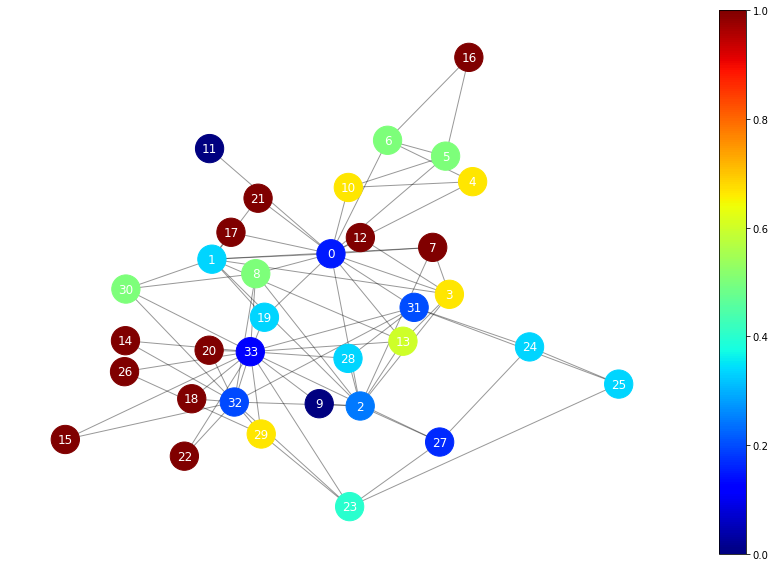

In [127]:
# grafico coeficiente de agrupamento local

# rede
G = KCG

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = val_cal

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=800,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [128]:
# coeficiente de agrupamento médio

G = KCG

cam = nx.average_clustering(G)

print(f"coeficiente de agrupamento médio da rede = {cam}")

coeficiente de agrupamento médio da rede = 0.5706384782076823


In [129]:
# coeficiente de agrupamento total

G = KCG

cat = nx.transitivity(G)

print(f"coeficiente de agrupamento total da rede = {cat}")

coeficiente de agrupamento total da rede = 0.2556818181818182


### Homofilia

- Uma das informações importantes em redes complexas é saber se os nós possuem alguma tendência se ligar mais a nós similares a si mesmo, o que é conhecido como homofilia ou associatividade. 

- Considere um grafo particionado em grupos $\{V^1,V^2,\ldots,V^a\}$ de acordo com atributos que esses nós possuam. 

- O índice EI mede a homofilia através de uma razão que envolve a quantidade de ligações entre nós de grupos distintos ($EL$) e a quantidade de ligações entre nós do mesmo grupo ($IL$). 

- O índice EI pode ser calculado para um subconjunto qualquer de nós da rede.

- Dada a partição dos nós, defina uma função indicadora $\delta: V\times V\rightarrow \{0,1\}$
$$
\delta(i,j)=
\begin{cases}
1, & \text{ se existe } k \text{ tal  que } i,j \in V^k,\\
0, & \text{ caso contrário.}
\end{cases}
$$

- Seja $V'\subseteq V$, então podemos encontrar o número de ligações internas e externas envolvendo os nós em $V'$, respectivamente, por

$$
IL(V')=\sum_{i\in V'}\sum_{j\notin V' \; ou \; j>i}A(i,j)\delta(i,j)
$$
e
$$
EL(V')=\sum_{i\in V'}\sum_{j\notin V' \; ou \; j>i}A(i,j)(1-\delta(i,j))
$$


$$
EI(V')=\frac{EL(V')-IL(V')}{EL(V')+IL(V')}
$$

- O valor do índice EI varia no intervalo $[-1,1]$, em que um índice EI igual a -1 (resp., 1) indica um subconjunto de nós que só possui ligações internas (resp., externas).

### Três tipos de assortatividade: 

- Os nós estão particionados em uma quantidade finita de grupos de atributos. 

- Os atributos dos nós são caracterizados por valores escalares, tais como idade, PIB, índice h, etc. 

- O atributo utilizado para avaliar a homofilia é a própria centralidade de grau dos nós.


### Assortatividade - Atributos Categóricos

- Considere um conjunto V de vértices de um grafo possa ser particionado em grupos $\{V^1, V^2, \ldots, V^a\}$.

- A fração de arestas que ligam um nó no conjunto $V^i$ a um nó no conjunto $V^j$:
$$
e_{ij}=\frac{1}{c}\sum_{k_1\in V^i}\sum_{k_2\in V^j}A(k_1,k_2),
$$
em que $c=m$ ou $c=2m$ se a rede é direcionada ou não-direcionada, respectivamente.

- A fração de arestas que iniciam (resp., terminam) em vértices do conjunto $V_i$ é dada, respetivamente, por $a_i=\sum_j e_{ij}$, $b_i=\sum_j e_{ji}$.

-  Em redes não direcionadas, temos que $e_{ij}=e_{ji}$ e $a_i=b_i$. 

- Se as ligações da rede fossem formadas aleatoriamente mantidas as frequências das arestas incidentes em nós de cada grupo, a fração esperada de ligação entre nós pertencentes a um grupo $V^i$ seria igual a $a_ib_i$.

- O coeficiente de assortatividade é dado por:
$$
As^c(G)=\frac{\sum_{i=1}^ae_{ii}-\sum_{i=1}^{a}a_ib_i}{1-\sum_{i=1}^{a}a_ib_i},
$$

### Assortatividade - Atributos Escalares

- Seja $x_i$ o atributo escalar do no $i$. Então, como o nó $i$ possui $d(i)$ arestas ligadas a ele, o valor médio dos atributos escalares ao longo das arestas é dado por:
$$
\overline{x}=\frac{\sum_i d(i)x_i}{\sum_i d(i)}=\frac{1}{2m}\sum_i d(i)x_i.
$$

- A covariância ao longo das arestas dos atributos de suas extremidades é:
$$
\frac{\sum_{ij}A(i,j)(x_i-\overline{x})(x_j-\overline{x})}{\sum_{ij}A(i,j)} = \frac{1}{2m}\left(\sum_{ij}A(i,j)x_ix_j\right) - \overline{x}^2 =
\frac{1}{2m}\left[\sum_{ij}\left(A(i,j) - \frac{d(i)d(j)}{2m}\right)x_ix_j\right].
$$

- Para garantir que a rede com homofilia perfeita em que só existam ligações entre nós com exatamente o mesmo atributo escalar tenha coeficiente de assortatividade igual a 1, a covariância é normalizada dividindo pelo seu maior valor possível.

- O coeficiente de assortatividade para atributos escalares é calculado como o coeficiente de correlação de Pearson.

- O coeficiente de assortatividade é:
$$
As^e(G) = 
\frac{\frac{1}{2m}\sum_{ij}\left(A(i,j)x_ix_j\right) -  \overline{x}^2}{\frac{1}{2m}\sum_{ij}\left(A(i,j)x_i^2\right) -  \overline{x}^2}\nonumber = 
\frac{\sum_{ij}\left(A(i,j) - \frac{d(i)d(j)}{2m}\right)x_ix_j}{\sum_{i}d(i)x_i^2 - \frac{1}{2m}\left(\sum_i d(i)x_i\right)^2}
$$

### Assortatividade de grau

- Um caso especial de assortatividade com atributo escalar que é bastante utilizado é quando o atributo escalar é a própria centralidade de grau, ou seja, $x_i=d(i)$.

- Esta assortatividade mede se na rede existe uma tendência de nós muito conectados estarem conectados entre si e nós pouco conectados estarem ligados entre si.

### Funções do networkX

- **nx.attribute_assortativity_coefficient**: retorna a assortatividade relacionada com atributos categóricos.

- **nx.numeric_assortativity_coefficient()**: retorna a assortatividade relacionada com atributos numéricos. 

- **nx.degree_assortativity_coefficient()**: retorna a assortatividade para o atributo igual ao grau. 

**Exemplo**

Considere o exemplo da rede dos personagens do segundo livro da saga de Harry Potter.

As ligações nessa rede representam suporte emocional e, portanto, trata-se de uma rede direcionada com matriz de adjacência não simétrica.

In [130]:
def carregarlivro(livro):
    atri = pd.read_csv('data/harrypotter/hpattributes.txt', sep='\t')
    livros = pd.read_csv('data/harrypotter/hpbook{:1d}.txt'.format(livro), sep=' ', header=None)
    nome = pd.read_csv('data/harrypotter/hpnames.txt', sep='\t')

    DG = nx.DiGraph()
    
    ni = atri.shape[0]

    # add nodes
    for k in range(ni):
        DG.add_node(
            k,
            nome = nome['name'][k], 
            ano = atri['schoolyear'][k], 
            gen = atri['gender'][k], 
            casa = atri['house'][k])
    
    # add arestas
    for k in range(ni):
        for m in range(ni):
            if livros.values[k][m] == 1:
                DG.add_edge(k,m)

    gen_ = nx.attribute_assortativity_coefficient(DG, "gen")
    casa_ = nx.attribute_assortativity_coefficient(DG, "casa")
    ano_ = nx.numeric_assortativity_coefficient(DG.to_undirected(), "ano")
    grau_ = nx.degree_assortativity_coefficient(DG.to_undirected(), "grau")

    return gen_, casa_, ano_, grau_, DG

In [136]:
livros = list(range(1,7))

nl = len(livros)
gen_ = np.zeros(nl)
casa_ = np.zeros(nl)
ano_ = np.zeros(nl)
grau_ = np.zeros(nl)

for k in range(nl):
    gen_[k], casa_[k], ano_[k], grau_[k], G = carregarlivro(livros[k])

In [137]:
print("genero:")
for k in range(nl):
    print(f"(l{k}) {gen_[k]};", end = " ")

genero:
(l0) 0.12816188870151718; (l1) 0.2041127189642044; (l2) 0.11094224924012172; (l3) 0.1833333333333332; (l4) 0.046357615894039916; (l5) 0.3748994368463396; 

In [138]:
print("casa:")
for k in range(nl):
    print(f"(c{k}) {casa_[k]};", end = " ")

casa:
(c0) 1.0; (c1) 0.7185261003070625; (c2) 0.6623376623376621; (c3) 0.6614853195164079; (c4) 0.5890781292241146; (c5) 0.6614133197763092; 

In [139]:
print("ano:")
for k in range(nl):
    print(f"(a{k}) {ano_[k]};", end = " ")

ano:
(a0) 0.5016286649101581; (a1) 0.2510710957627362; (a2) 0.2509236143290379; (a3) 0.32806759721478573; (a4) 0.440817117987569; (a5) 0.7039488445598743; 

In [140]:
print("grau:")
for k in range(nl):
    print(f"(g{k}) {grau_[k]};", end = " ") 

grau:
(g0) 0.1757400476352498; (g1) -0.11134929623038382; (g2) -0.07515682189975174; (g3) 0.02761527332200843; (g4) -0.13094334387872678; (g5) 0.07570608669385186; 

In [141]:
livros = list(range(1,7))

nl = len(livros)
gen_ = np.zeros(nl)
casa_ = np.zeros(nl)
ano_ = np.zeros(nl)
grau_ = np.zeros(nl)

for k in range(nl):
    #print("livro ", k, end = ": ")
    gen_[k], casa_[k], ano_[k], grau_[k], G = carregarlivro(livros[k])
    #print(f"gen = {gen_[k]}; casa = {casa_[k]}; ano = {ano_[k]}; grau = {grau_[k]}")

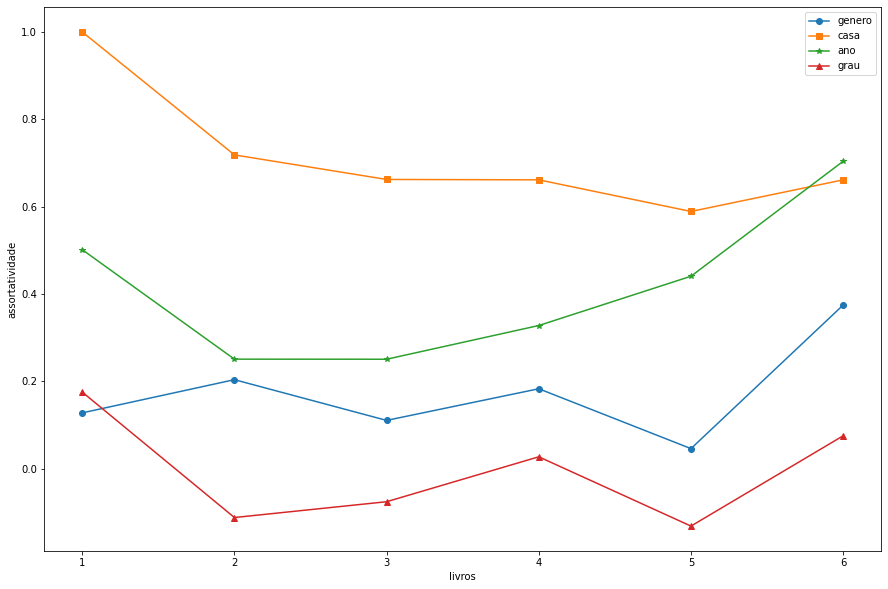

In [142]:
fig = plt.subplots(1,1,figsize=(15,10))

plt.plot(livros, gen_, '-o', label = 'genero')
plt.plot(livros, casa_, '-s', label = 'casa')
plt.plot(livros, ano_, '-*', label = 'ano')
plt.plot(livros, grau_, '-^', label = 'grau')
plt.legend()

plt.xlabel('livros')
plt.ylabel('assortatividade')
plt.show()